In [1]:
import datetime
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.set_option('max_rows', 5)
%matplotlib inline

## 層別グラフ
---
ある特徴 (通常はカテゴリカル変数の値) によって、いくつかのグループに分けられたグラフ。  
グループごとに傾向の差があるのか比較するのに用いる。

### 層別棒グラフ

va


,Rural Male,Rural Female,Urban Male,Urban Female
50-54,11.7,8.7,15.4,8.4
55-59,18.1,11.7,24.3,13.6
60-64,26.9,20.3,37.0,19.3
65-69,41.0,30.9,54.6,35.1
70-74,66.0,54.3,71.1,50.0


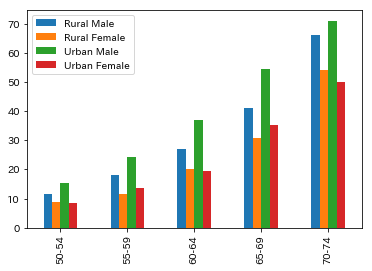

In [2]:
va = pd.read_csv('data/VADeaths.csv', index_col=0)
print('va')
display(va)

va.plot.bar()
plt.show()

#### Pythonでの層別棒グラフ表示
---
`seaborn.countplot`、`pandas.DataFrame.plot.bar`などを用いる。

In [3]:
tips = sns.load_dataset('tips')
print('tips')
display(tips)

tips


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [4]:
sns.countplot??

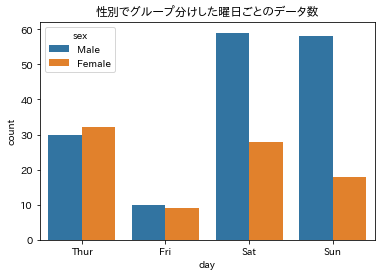

In [5]:
sns.countplot('day', hue='sex', data=tips)
plt.title('性別でグループ分けした曜日ごとのデータ数')
plt.show()

In [6]:
pd.DataFrame.plot.bar??

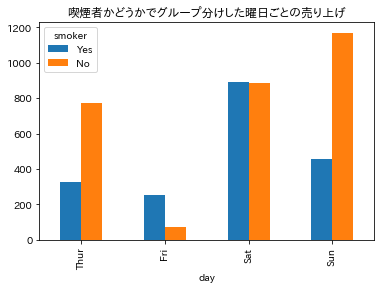

In [7]:
pd.crosstab(
    tips['day'], tips['smoker'], values=tips['total_bill'],
    aggfunc=sum).plot.bar()
plt.title('喫煙者かどうかでグループ分けした曜日ごとの売り上げ')
plt.show()

###### 練習問題

tipsデータセットの`time`列でグループ分けし、`day`ごとのデータ数を層別棒グラフで表示する。

In [8]:
print('tips')
display(tips)

tips


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


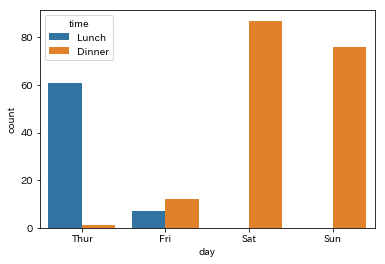

In [9]:
sns.countplot('day', hue='time', data=tips)
plt.show()

### 積み上げ棒グラフ
---
カテゴリ別の値を縦に積み上げた棒グラフ。全体の変化や割合の変化を見るために用いる。

va


,Rural Male,Rural Female,Urban Male,Urban Female
50-54,11.7,8.7,15.4,8.4
55-59,18.1,11.7,24.3,13.6
60-64,26.9,20.3,37.0,19.3
65-69,41.0,30.9,54.6,35.1
70-74,66.0,54.3,71.1,50.0


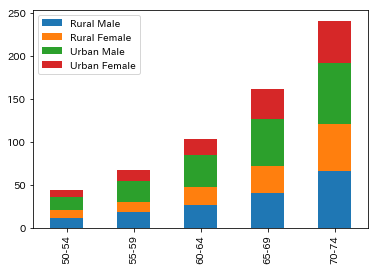

In [10]:
print('va')
display(va)
va.plot.bar(stacked=True)
plt.show()

#### Pythonでの積み上げ棒グラフ表示
---
`pandas.DataFrame.plot.bar`を用いる。

In [11]:
pd.DataFrame.plot.bar??

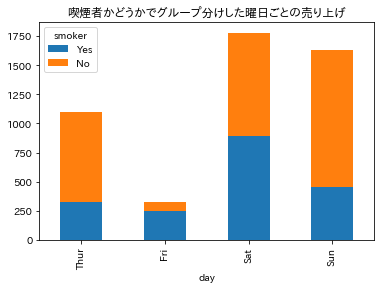

In [12]:
pd.crosstab(
    tips['day'], tips['smoker'], values=tips['total_bill'],
    aggfunc=sum).plot.bar(stacked=True)
plt.title('喫煙者かどうかでグループ分けした曜日ごとの売り上げ')
plt.show()

###### 練習問題

tipsデータセットの`sex`列でグループ分けし、`day`ごとのデータ数を積み上げ棒グラフで表示する。

In [13]:
print('tips')
display(tips)

tips


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


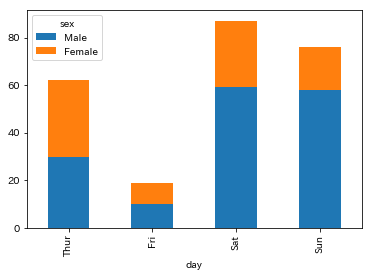

In [14]:
pd.crosstab(tips['day'], tips['sex']).plot.bar(stacked=True)
plt.show()

### 100%積み上げ棒グラフ
---
積み上げ棒グラフの高さを揃えたグラフ。割合の変化を見るのに用いる。

va


,Rural Male,Rural Female,Urban Male,Urban Female
50-54,11.7,8.7,15.4,8.4
55-59,18.1,11.7,24.3,13.6
60-64,26.9,20.3,37.0,19.3
65-69,41.0,30.9,54.6,35.1
70-74,66.0,54.3,71.1,50.0


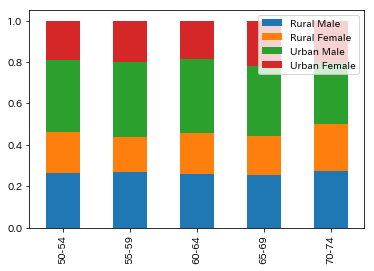

In [15]:
print('va')
display(va)
va.apply(lambda x: x / va.sum(axis=1), axis=0).plot.bar(stacked=True)
plt.show()

#### Pythonでの100%積み上げ棒グラフ表示
---
データセットの数値を割合に計算し直してから、`pandas.DataFrame.plot.bar`を用いる。

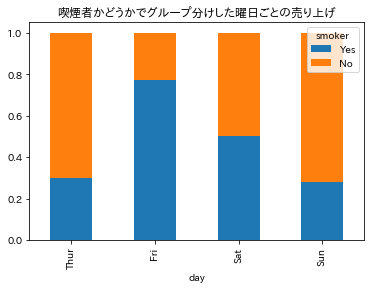

In [16]:
pd.crosstab(
    tips['day'],
    tips['smoker'],
    values=tips['total_bill'],
    aggfunc=sum,
    normalize='index').plot.bar(stacked=True)
plt.title('喫煙者かどうかでグループ分けした曜日ごとの売り上げ')
plt.show()

###### 練習問題

tipsデータセットの`smoker`列でグループ分けし、`day`ごとのデータ数を100%積み上げ棒グラフで表示する。

In [17]:
print('tips')
display(tips)

tips


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


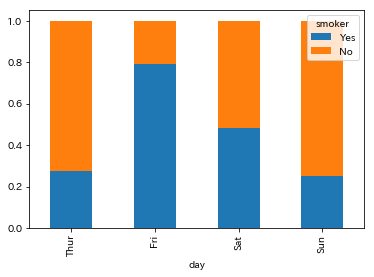

In [18]:
pd.crosstab(
    tips['day'], tips['smoker'], normalize='index').plot.bar(stacked=True)
plt.show()

### 層別箱ひげ図

iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
...,...,...,...,...,...
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


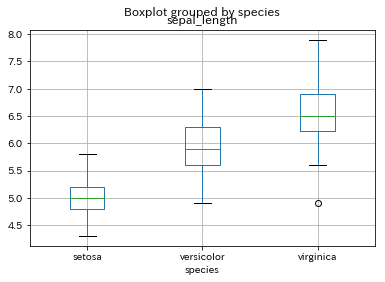

In [19]:
iris = sns.load_dataset('iris')
print('iris')
display(iris)

iris.boxplot('sepal_length', by='species')
plt.show()

#### Pythonでの層別箱ひげ図表示
---
`seaborn.boxplot`、`pandas.DataFrame.boxplot`などを用いる。

In [20]:
print('tips')
display(tips)

tips


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [21]:
sns.boxplot??

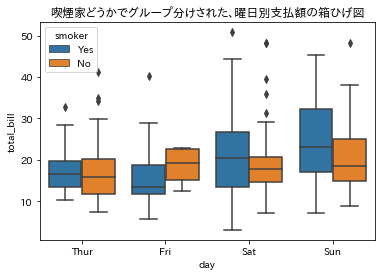

In [22]:
sns.boxplot('day', 'total_bill', hue='smoker', data=tips)
plt.title('喫煙家どうかでグループ分けされた、曜日別支払額の箱ひげ図')
plt.show()

In [23]:
pd.DataFrame.boxplot??

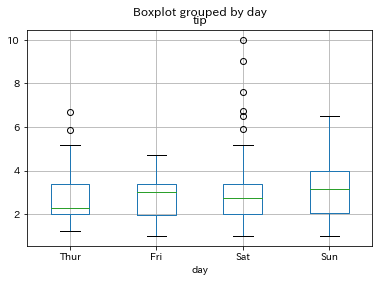

In [24]:
tips.boxplot('tip', by='day')
plt.show()

###### 練習問題

irisデータセットの`species`列でグループ分けし、`petal_length`列の箱ひげ図を表示する。

In [25]:
print('iris')
display(iris)

iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
...,...,...,...,...,...
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


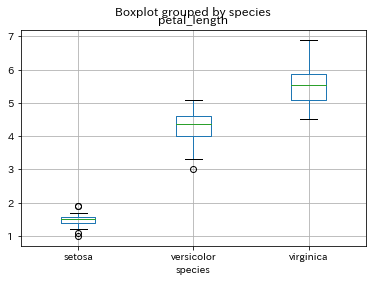

In [26]:
iris.boxplot('petal_length', by='species')
plt.show()

### 層別散布図

whiteside


,Insul,Temp,Gas
0,Before,-0.8,7.2
1,Before,-0.7,6.9
...,...,...,...
54,After,8.8,1.3
55,After,9.7,1.5


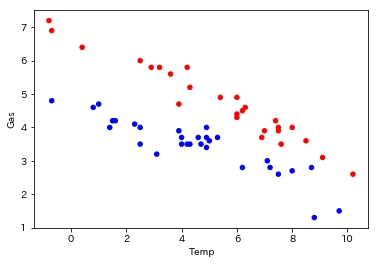

In [27]:
whiteside = pd.read_csv('data/whiteside.csv')
print('whiteside')
display(whiteside)

whiteside.plot.scatter(
    x='Temp',
    y='Gas',
    c=whiteside['Insul'].astype('category').cat.rename_categories(
        ['blue', 'red']))
plt.show()

#### Pythonでの層別散布図表示
---
`seaborn.scatterplot`、`pandas.DataFrame.plot.scatter`、`matplotlib.pyplot.scatter`などを用いる。

In [28]:
mpg = sns.load_dataset('mpg')
print('mpg')
display(mpg)

mpg


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
...,...,...,...,...,...,...,...,...,...
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [29]:
sns.scatterplot??

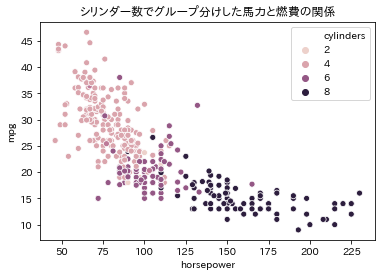

In [30]:
sns.scatterplot('horsepower', 'mpg', hue='cylinders', data=mpg)
plt.title('シリンダー数でグループ分けした馬力と燃費の関係')
plt.show()

In [31]:
pd.DataFrame.plot.scatter??

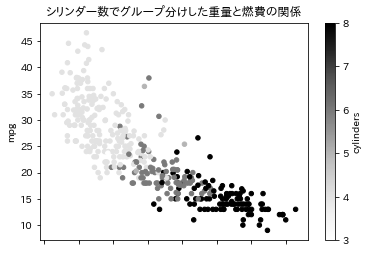

In [32]:
mpg.plot.scatter('weight', 'mpg', c='cylinders')
plt.title('シリンダー数でグループ分けした重量と燃費の関係')
plt.show()

In [33]:
plt.scatter??

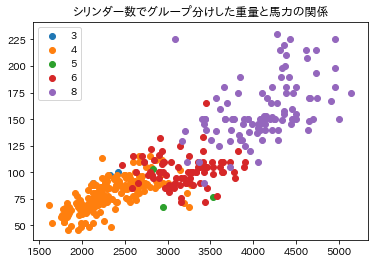

In [34]:
for label in sorted(mpg['cylinders'].unique()):
    plt.scatter(
        'weight',
        'horsepower',
        data=mpg.query('cylinders==@label'),
        label=label)
plt.legend()
plt.title('シリンダー数でグループ分けした重量と馬力の関係')
plt.show()

###### 練習問題

irisデータセットの`species`列でグループ分けし、 x 軸を`petal_length`、 y 軸を`petal_width`にして散布図を表示する。

In [35]:
print('iris')
display(iris)

iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
...,...,...,...,...,...
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


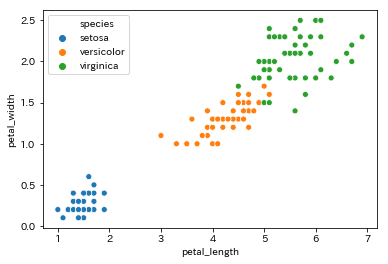

In [36]:
sns.scatterplot('petal_length', 'petal_width', hue='species', data=iris)
plt.show()

### インタラクティブなグラフ表示
---
層別グラフは表示するカテゴリをインタラクティブに選択できると生産的。

#### Plotly
---
Pythonの代表的なインタラクティブな表現のできるグラフライブラリ。  
引数のネストが深すぎてドキュメントが使いにくいので、サンプルにある以上の細かいカスタマイズはやらないほうが無難。どうしてもやる場合はエラーメッセージのほうがわかりやすいので、なさそうな引数名を適当に入れてエラーメッセージをたどっていくのが効率的。

In [37]:
from plotly.offline import init_notebook_mode
import plotly.offline as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)

data = []
for label in sorted(mpg['cylinders'].unique()):
    subset = mpg.query('cylinders==@label')
    trace = go.Scatter(
        x=subset['weight'],
        y=subset['horsepower'],
        name=str(label),
        mode='markers',
        hovertext=subset['name'])
    data.append(trace)
layout = dict(title='シリンダー数でグループ分けした重量と馬力の関係')
fig = dict(data=data, layout=layout)
py.iplot(fig)

#### BIツール
---
有料のものが多いが、その分データの可視化では生産性が上がる。

## 複数系列グラフ
---
同じ時間軸上に表示された複数の変数のグラフ。

inflation


,CPIAUCSL,CPILFESL
DATE,,
2008-01-01,212.174,213.771
2008-02-01,212.687,213.939
...,...,...
2017-11-01,247.332,253.887
2017-12-01,247.901,254.445


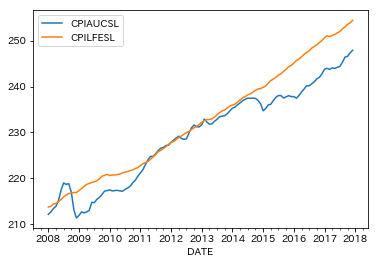

In [38]:
start = datetime.datetime(2008, 1, 1)
end = datetime.datetime(2017, 12, 31)
inflation = web.DataReader(['CPIAUCSL', 'CPILFESL'], 'fred', start, end)
print('inflation')
display(inflation)
inflation.plot()
plt.show()

### Pythonでの複数系列グラフ表示
---
`seaborn.lineplot`、`pandas.DataFrame.plot`、`matplotlib.pyplot.plot`などを用いる。

In [39]:
tiingo_access_key = 'YOUR_API_KEY'
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 12, 31)
column_map = dict(GOOGL='Google', AAPL='Apple', FB='Facebook', AMZN='Amazon')
stocks = web.DataReader(['GOOGL', 'AAPL', 'FB', 'AMZN'],
                        'tiingo',
                        start,
                        end,
                        access_key=tiingo_access_key)['close'].unstack(level=0)
stocks.columns = [column_map[k] for k in stocks.columns]
print('stocks')
display(stocks)

stocks


,Apple,Amazon,Facebook,Google
date,,,,
2018-01-02,172.26,1189.01,181.42,1073.21
2018-01-03,172.23,1204.20,184.67,1091.52
...,...,...,...,...
2018-12-28,156.23,1478.02,133.20,1046.68
2018-12-31,157.74,1501.97,131.09,1044.96


In [40]:
sns.lineplot??

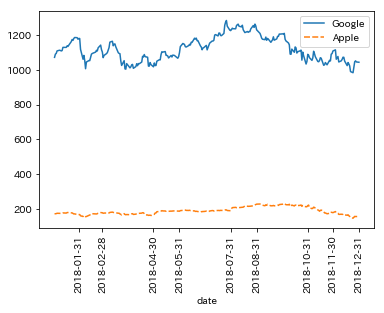

In [41]:
sns.lineplot(data=stocks[['Google', 'Apple']])
monthly = pd.date_range(stocks.index[0], stocks.index[-1], freq='M')
idx = [i for i, d in enumerate(stocks.index) if d in monthly]
xticks = stocks.index[idx]
xticklabels = stocks.index.date[idx]
plt.xticks(xticks, xticklabels, rotation='vertical')
plt.show()

In [42]:
pd.DataFrame.plot??

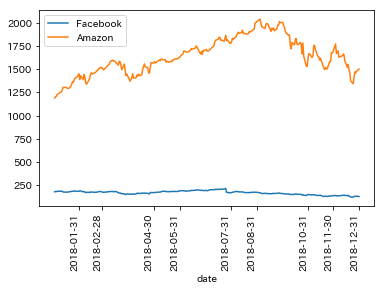

In [43]:
stocks[['Facebook', 'Amazon']].plot()
plt.xticks(xticks, xticklabels, rotation='vertical')
plt.show()

In [44]:
plt.plot??

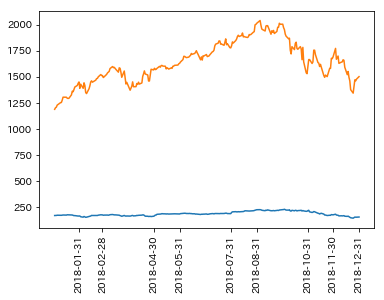

In [45]:
plt.plot(stocks.index, stocks[['Apple', 'Amazon']])
plt.xticks(xticks, xticklabels, rotation='vertical')
plt.show()

###### 練習問題

economicsデータセットの`psavert`列と`uempmed`列を折れ線グラフで表示する。

In [46]:
economics = pd.read_csv('data/economics.csv', parse_dates=[0])
print('economics')
display(economics)

economics


,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
...,...,...,...,...,...,...
572,2015-03-01,12161.5,320707,5.2,12.2,8575
573,2015-04-01,12158.9,320887,5.6,11.7,8549


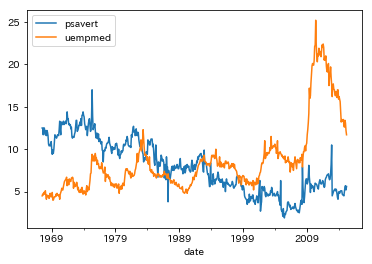

In [47]:
economics.plot('date', ['psavert', 'uempmed'])
plt.show()